# Coursera Capstone

In [28]:
import numpy as np
import pandas as pd

## Introduction:
This project predicts the severity of car accidents using variables such as time and location. It would be beneficial for the police department and/or the development department to acknowledge the attributes of accidents that cause the most harm and damages in order to avoid them by implementing alternative city planning from the development department and patrolling schedule from the police department.

## Data:
The dataset records the collision data in Seattle from 2004 to May 2020. The target variable we are looking at is the severity code. Other variables include location data (i.e. coordinates, street name),  timestamp data, and environmental data (weather, light condition, road condition). 

## Methodology

In [29]:
df = pd.read_csv('Data_collision_2015.csv')

In [30]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [31]:
df.drop(['SEVERITYCODE.1','EXCEPTRSNCODE','EXCEPTRSNDESC','SPEEDING',\
         'PEDROWNOTGRNT','INATTENTIONIND'], axis = 1, inplace = True)

In [32]:
df.dropna(subset = ['X', 'WEATHER','ROADCOND','LIGHTCOND','JUNCTIONTYPE','COLLISIONTYPE'], inplace = True)

### Extract data from the last five years

In [34]:
df.INCDATE = pd.to_datetime(df.INCDATE)
df['incYear'] = pd.DatetimeIndex(df['INCDATE']).year

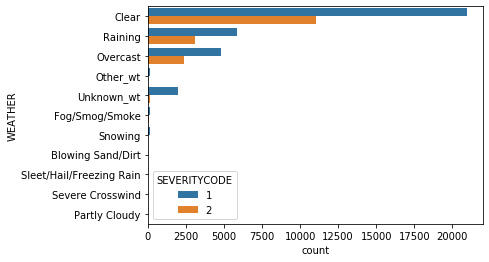

In [35]:
import seaborn as sns
sns.countplot(y='WEATHER', hue = 'SEVERITYCODE', data = df)

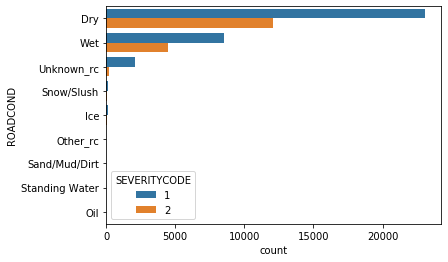

In [36]:
sns.countplot(y='ROADCOND', hue = 'SEVERITYCODE', data = df)

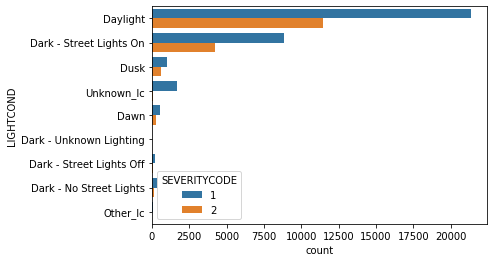

In [37]:
sns.countplot(y='LIGHTCOND', hue = 'SEVERITYCODE', data = df)

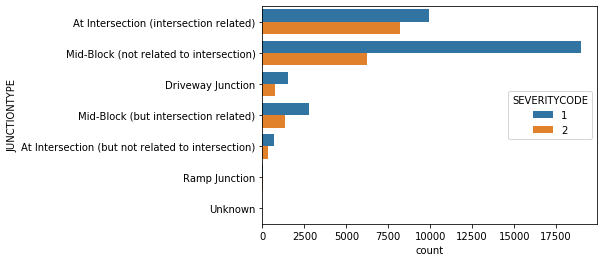

In [38]:
sns.countplot(y='JUNCTIONTYPE', hue = 'SEVERITYCODE', data = df)

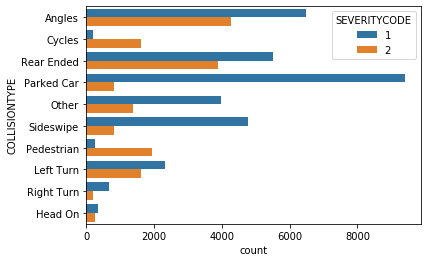

In [39]:
sns.countplot(y='COLLISIONTYPE', hue = 'SEVERITYCODE', data = df)

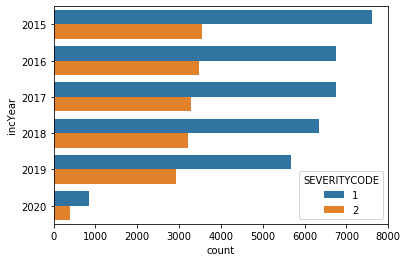

In [40]:
sns.countplot(y='incYear', hue = 'SEVERITYCODE', data = df)

### Convert Categorical variables to numerical values

In [41]:
df['WEATHER'].replace(to_replace=['Overcast', 'Raining', 'Clear', 'Unknown_wt', 'Other_wt',
       'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain',
       'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'], 
        value=np.arange(df.WEATHER.nunique()),inplace=True)
df['ROADCOND'].replace(to_replace=['Wet', 'Dry', 'Unknown_rc', 'Snow/Slush', 'Ice', 'Other_rc',
       'Sand/Mud/Dirt', 'Standing Water', 'Oil'],
        value=np.arange(df.ROADCOND.nunique()).tolist(),inplace=True)
df['LIGHTCOND'].replace(to_replace=['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown_lc', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other_lc', 'Dark - Unknown Lighting'],
        value=np.arange(df.LIGHTCOND.nunique()).tolist(),inplace=True)
df['JUNCTIONTYPE'].replace(to_replace=['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'At Intersection (but not related to intersection)',
       'Mid-Block (but intersection related)','Ramp Junction',
       'Unknown'],
        value=np.arange(df.JUNCTIONTYPE.nunique()).tolist(),inplace=True)
df['COLLISIONTYPE'].replace(to_replace=['Angles', 'Cycles', 'Rear Ended', 'Parked Car', 'Other',
       'Sideswipe', 'Pedestrian', 'Left Turn', 'Right Turn', 'Head On'],
        value=np.arange(df.COLLISIONTYPE.nunique()).tolist(),inplace=True)


In [42]:
df['UID'] = np.where((df['UNDERINFL'] == 1)|(df['UNDERINFL'] == 'Y'),1, 0)
df['HPC'] = np.where((df['HITPARKEDCAR'] == 'Y'),1, 0)

In [43]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,incYear,UID,HPC
0,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,0,NaN,10,Entering at angle,0,0,N,2019,0,0
1,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,0,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,2020,0,0
3,2,-122.328270,47.571420,24,330833,332333,EA29752,Matched,Block,NaN,...,0,NaN,14,From same direction - both going straight - on...,0,0,N,2020,0,0
4,2,-122.312857,47.599218,34,320932,322432,E926429,Matched,Block,NaN,...,0,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N,2019,0,0
5,1,-122.318741,47.676567,44,320910,322410,E925173,Matched,Block,NaN,...,0,NaN,32,One parked--one moving,0,0,Y,2019,0,1


In [ ]:
import folium
from folium import plugins

In [ ]:
sea_map = folium.Map(location=[47.613429, -122.323970], zoom_start=11)

# incidents = plugins.MarkerCluster(icon_create_function=icon_create_function).add_to(can_map)
incidents = plugins.MarkerCluster().add_to(sea_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df.Y, df.X, df.LOCATION):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)
    
sea_map

In [44]:
predictors = df[['JUNCTIONTYPE','UID','WEATHER','ROADCOND','LIGHTCOND','HPC',
                'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','COLLISIONTYPE']]
target = df['SEVERITYCODE'].values

In [45]:
predictors.head()

,JUNCTIONTYPE,UID,WEATHER,ROADCOND,LIGHTCOND,HPC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,COLLISIONTYPE
0,0,0,2,1,0,0,2,0,0,2,0
1,0,0,2,1,0,0,3,0,1,1,1
3,1,0,2,1,0,0,4,0,0,3,2
4,1,0,2,1,0,0,2,0,1,1,1
5,1,0,1,0,0,1,2,0,0,2,3


In [46]:
from sklearn.model_selection import train_test_split
X = predictors
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

### KNN

#### Select the best k

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7143112594623592 with k= 8


In [48]:
k = mean_acc.argmax()+1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = neigh.predict(X_test)

In [49]:
from sklearn import metrics
metrics.accuracy_score(y_test, yhat_knn)

0.7143112594623592

### Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=6, random_state=123, n_estimators = 300).fit(X_train, y_train)
yhat_rf = clf.predict(X_test)

In [51]:
from sklearn import metrics
metrics.accuracy_score(y_test, yhat_rf)

0.7324313047624724

### SVM

In [52]:
from sklearn import svm
svm = svm.SVC(kernel='rbf').fit(X_train, y_train) 
yhat_svm = svm.predict(X_test)

In [53]:
from sklearn import metrics
metrics.accuracy_score(y_test, yhat_svm)

0.7333849913572152

## Results:
Using the variables in the predictors set, I modeled using KNN, random forest, and SVM. SVM resulted in the highest accuracy score of 73.4% in predicting the severity code.

## Discussion:
Based on the graphs shown above, environmental factors (weather, road condition, light condition) play a big role to the collisions. Surprisingly, the number of collisions is significantly higher in the ideal environment (ie on a clear day, dry roads, and in the daylight). It may be because people are way more careful when they are driving in worse environment, therefore, resulted in less collisions. Collisions with fatalities are half the number of collisions without fatalities in the ideal environment. On the other hand, there is a significantly higher number of collisions happening at an intersection and at mid-block, where the highest number of collision with fatalities happens at an intersection, and the the highest number of collision without fatalities happens at mid-block.

## Conclusion:
Through this project, a lot of unexpected insights are found. For example, there are drastically higher number of collisions in the best environment possible, and any collisions involving pedestrians and cyclists almost always result in fatalities. Therefore, drivers must be cautious at all time regardless of the environment. Luckily, we are seeing a downward trend in collisions from 2015 to 2019.